# Corporate performance

## Imports

In [51]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import numpy as np
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from tqdm import tqdm
import warnings
import math
warnings.filterwarnings('ignore')

## Load data

In [52]:
visa = quandl.get('WIKI/V')
american_express = quandl.get('WIKI/AXP')
mastercard = quandl.get('WIKI/MA')

In [53]:
print(visa.shape)
print(american_express.shape)
print(mastercard.shape)

(2523, 12)
(11556, 12)
(2978, 12)


In [54]:
mastercard.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-05-25,40.30,47.20,40.20,46.00,39534300.0,0.0,1.0,3.829758,4.485473,3.820255,4.371436,395343000.0
2006-05-26,46.31,46.74,44.11,44.93,10304400.0,0.0,1.0,4.400895,4.441759,4.191827,4.269752,103044000.0
2006-05-30,44.97,44.98,42.85,44.00,4989800.0,0.0,1.0,4.273554,4.274504,4.072087,4.181373,49898000.0
2006-05-31,44.35,45.36,44.35,44.94,3000200.0,0.0,1.0,4.214634,4.310616,4.214634,4.270703,30002000.0
2006-06-01,44.93,48.10,44.90,47.51,6234400.0,0.0,1.0,4.269752,4.571001,4.266901,4.514933,62344000.0


### Align rows by date

In [55]:
american_express = american_express.loc['2008-03-19':]
mastercard = mastercard.loc['2008-03-19':]

In [56]:
print(visa.shape)
print(american_express.shape)
print(mastercard.shape)

(2523, 12)
(2523, 12)
(2522, 12)


## EDA

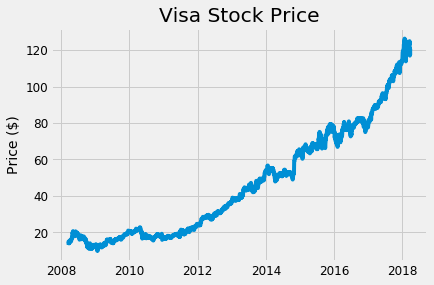

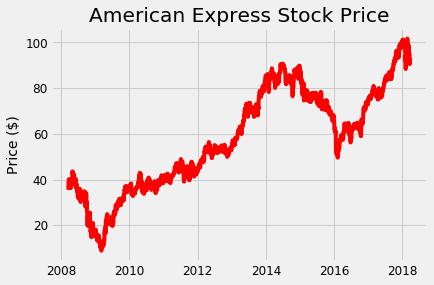

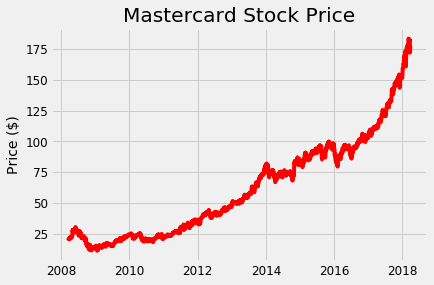

In [57]:
# Stock prices visualizations
plt.plot(visa.index, visa['Adj. Close'])
plt.title('Visa Stock Price')
plt.ylabel('Price ($)');
plt.show()

plt.plot(american_express.index, american_express['Adj. Close'], 'r')
plt.title('American Express Stock Price')
plt.ylabel('Price ($)');
plt.show();

plt.plot(mastercard.index, mastercard['Adj. Close'], 'r')
plt.title('Mastercard Stock Price')
plt.ylabel('Price ($)');
plt.show();

### Daily Market cap

In [58]:
# Yearly average number of shares outstanding for Visa, American Express and mastercard
visa_shares = {2018: 2586e6, 2017: 2654e6, 2016: 2678e6, 2015: 2724e6, 2014: 2794e6, 
                2013: 2897e6, 2012: 3856e6, 2011: 4088e6, 2010: 4384e6, 2009: 4608e6, 2008: 5576e6}

american_express_shares = {2018: 859e6, 2017: 886e6, 2016: 935e6, 2015: 1003e6, 2014: 1051e6, 
                2013: 1089e6, 2012: 1141e6, 2011: 1184e6, 2010: 1195e6, 2009: 1171e6, 2008: 1156e6}

mastercard_shares = {2018: 1047e6, 2017: 1072e6, 2016: 1101e6, 2015: 1137e6, 2014: 1169e6, 
                2013: 1215e6, 2012: 1258e6, 2011: 1284e6, 2010: 1310e6, 2009: 1300e6, 2008: 1300e6}

##### Adding daily market cap

In [59]:
# Create a year column 
visa['Year'] = visa.index.year

# Take Dates from index and move to Date column 
visa.reset_index(level=0, inplace = True)
visa['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(visa['Year']):
    # Retrieve the shares for the year
    shares = visa_shares.get(year)
    
    # Update the cap column to shares times the price #dayly market cap
    visa.ix[i, 'cap'] = shares * visa.ix[i, 'Adj. Close']

In [60]:
# Create a year column 
american_express['Year'] = american_express.index.year

# Take Dates from index and move to Date column 
american_express.reset_index(level=0, inplace = True)
american_express['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(american_express['Year']):
    # Retrieve the shares for the year
    shares = american_express_shares.get(year)
    
    # Update the cap column to shares times the price #dayly market cap
    american_express.ix[i, 'cap'] = shares * american_express.ix[i, 'Adj. Close']

In [61]:
mastercard['Year'] = mastercard.index.year

mastercard.reset_index(level=0, inplace = True)
mastercard['cap'] = 0

for i, year in enumerate(mastercard['Year']):
    shares = mastercard_shares.get(year)
    mastercard.ix[i, 'cap'] = shares * mastercard.ix[i, 'Adj. Close']

## Merge dataframes 

In [62]:
# Merge first two datasets
cars = visa.merge(american_express, how='inner', on='Date')


In [63]:
# merge with 3rd dataset
cars = cars.merge(mastercard, how='inner', on='Date')

In [64]:
#rename columns:
cars.rename(columns={'cap_x': 'visa_cap', 'cap_y': 'ax_cap', 'cap': 'mc_cap'}, inplace=True)

In [65]:
cars.tail()

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,mc_cap
2517,2018-03-21,124.90,125.44,123.07,123.22,7191393.0,0.0,1.0,124.90,125.44,...,3236218.0,0.0,1.0,182.96,183.50,180.74,180.75,3236218.0,2018,1.892452e+11
2518,2018-03-22,122.20,122.68,119.70,119.99,10470732.0,0.0,1.0,122.20,122.68,...,4358154.0,0.0,1.0,179.20,180.26,175.11,175.52,4358154.0,2018,1.837694e+11
2519,2018-03-23,119.89,120.73,116.76,117.00,9850483.0,0.0,1.0,119.89,120.73,...,4139453.0,0.0,1.0,176.18,177.79,171.66,171.83,4139453.0,2018,1.799060e+11
2520,2018-03-26,119.09,120.74,117.80,120.64,8622562.0,0.0,1.0,119.09,120.74,...,5178854.0,0.0,1.0,175.33,177.47,173.06,177.17,5178854.0,2018,1.854970e+11
2521,2018-03-27,121.52,121.60,116.74,117.40,8896249.0,0.0,1.0,121.52,121.60,...,4619313.0,0.0,1.0,178.36,178.50,170.97,172.52,4619313.0,2018,1.806284e+11


In [66]:
# Select only the relevant columns
cars = cars.ix[:, ['Date', 'visa_cap', 'ax_cap', 'mc_cap']]

# Divide to get market cap in billions of dollars
cars['visa_cap'] = cars['visa_cap'] / 1e9
cars['ax_cap'] = cars['ax_cap'] / 1e9
cars['mc_cap'] = cars['mc_cap'] / 1e9

cars.head()

,Date,visa_cap,ax_cap,mc_cap
0,2008-03-19,73.610682,41.061676,25.902985
1,2008-03-20,83.838007,44.952759,27.393348
2,2008-03-24,77.818868,46.350811,26.911062
3,2008-03-25,82.404879,46.448577,27.965130
4,2008-03-26,83.329898,44.346610,27.700370


## Market cap visualization

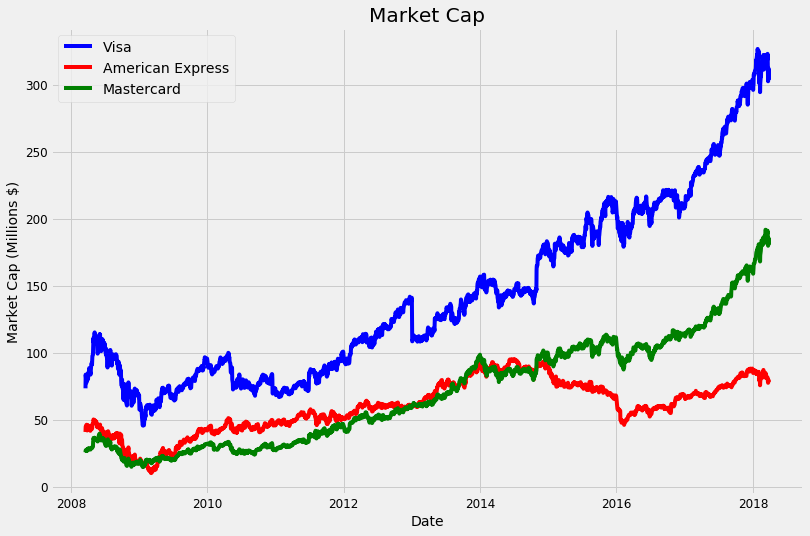

In [67]:
plt.figure(figsize=(12, 8))
plt.plot(cars['Date'], cars['visa_cap'], 'b-', label = 'Visa')
plt.plot(cars['Date'], cars['ax_cap'], 'r-', label = 'American Express')
plt.plot(cars['Date'], cars['mc_cap'], 'g-', label = 'Mastercard')
plt.xlabel('Date'); plt.ylabel('Market Cap (Millions $)'); plt.title('Market Cap')
plt.legend();


## Prophet Model

In [68]:
import fbprophet

In [69]:
# preparing data from Prophet modeling (we need to rename columns to fit the data)
visa = visa.rename(columns={'Date': 'ds', 'cap': 'y'})
# Put market cap in billions
visa['y'] = visa['y'] / 1e9

# Prophet modle
# changepoint_prior_scale can be changed to achieve a better fit
visa_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
visa_prophet.fit(visa)

#Ametican express model
american_express =american_express.rename(columns={'Date': 'ds', 'cap': 'y'})
american_express['y'] = american_express['y'] / 1e9
american_express_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
american_express_prophet.fit(american_express);

#Mastercard model
mastercard =mastercard.rename(columns={'Date': 'ds', 'cap': 'y'})
mastercard['y'] = mastercard['y'] / 1e9
mastercard_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
mastercard_prophet.fit(mastercard);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 1 Year Predictions 

In [70]:
# Make a future dataframe for 2 years
visa_forecast = visa_prophet.make_future_dataframe(periods=365*2 , freq='D')
# Make predictions
visa_forecast = visa_prophet.predict(visa_forecast)

american_express_forecast = american_express_prophet.make_future_dataframe(periods=365*2, freq='D')
american_express_forecast = american_express_prophet.predict(american_express_forecast)

mastercard_forecast = mastercard_prophet.make_future_dataframe(periods=365*2, freq='D')
mastercard_forecast = mastercard_prophet.predict(mastercard_forecast)

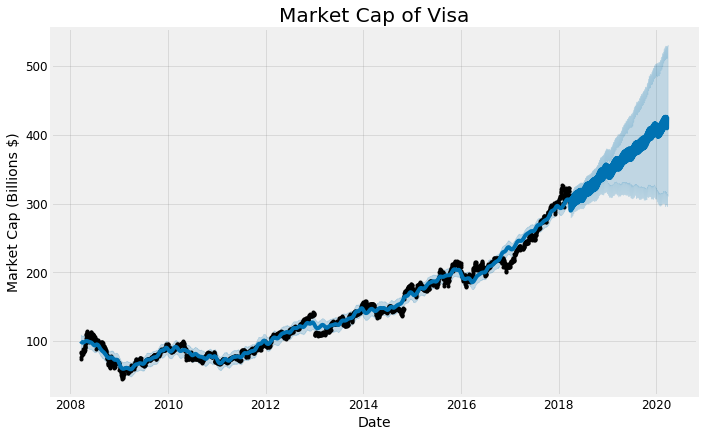

In [71]:
visa_prophet.plot(visa_forecast, xlabel = 'Date', ylabel = 'Market Cap (Billions $)')
plt.title('Market Cap of Visa');

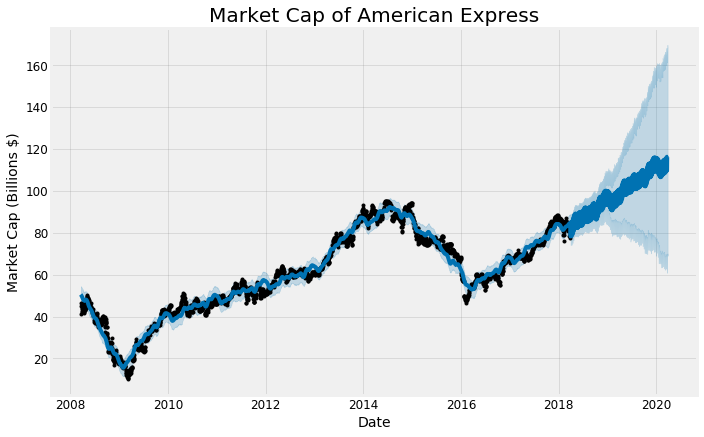

In [72]:
american_express_prophet.plot(american_express_forecast, xlabel = 'Date', ylabel = 'Market Cap (Billions $)')
plt.title('Market Cap of American Express');

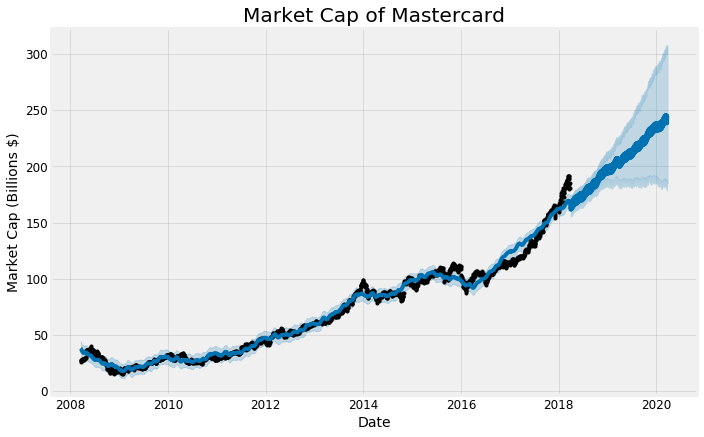

In [73]:
mastercard_prophet.plot(mastercard_forecast, xlabel = 'Date', ylabel = 'Market Cap (Billions $)')
plt.title('Market Cap of Mastercard');

### Changepoint effects

In [74]:
# Try 4 different changepoints
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(visa)
    
    future = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future)
    
    visa[changepoint] = future['yhat']

##### Plotting with differnt changepoints

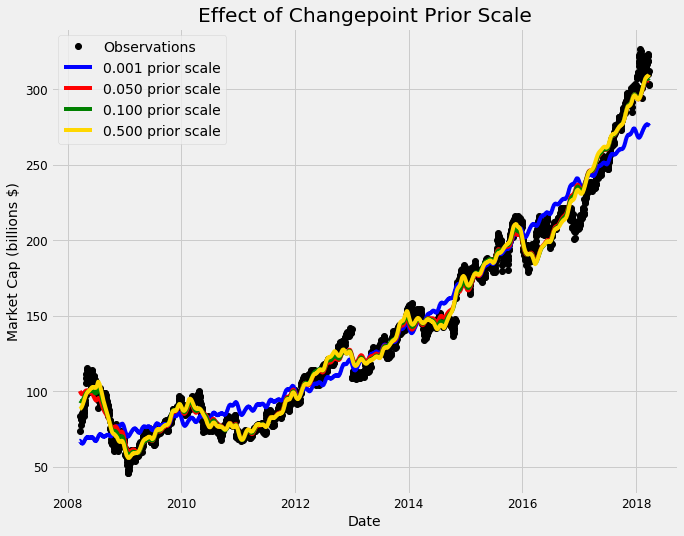

In [75]:
plt.figure(figsize=(10, 8))

plt.plot(visa['ds'], visa['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'g', 0.5: 'gold'}

for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(visa['ds'], visa[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)'); plt.title('Effect of Changepoint Prior Scale');


81    2008-07-15
161   2008-11-05
242   2009-03-05
323   2009-06-30
403   2009-10-22
484   2010-02-19
565   2010-06-16
645   2010-10-08
726   2011-02-03
807   2011-06-01
Name: ds, dtype: datetime64[ns]

## Model decomposition

### Visa trends

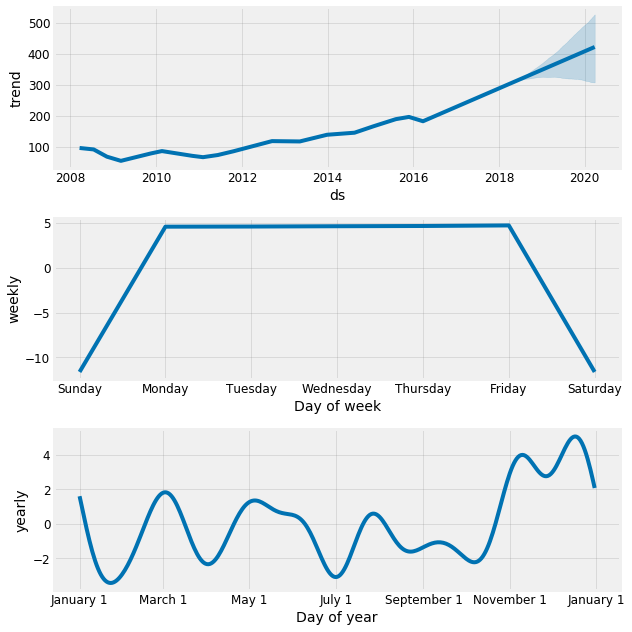

In [77]:
visa_prophet.plot_components(visa_forecast);

### American Express Trends

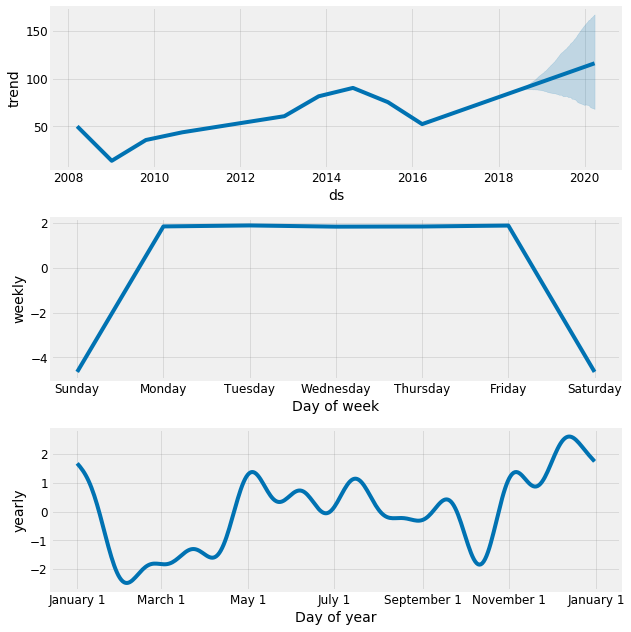

In [78]:
american_express_prophet.plot_components(american_express_forecast);

### Mastercard Trends

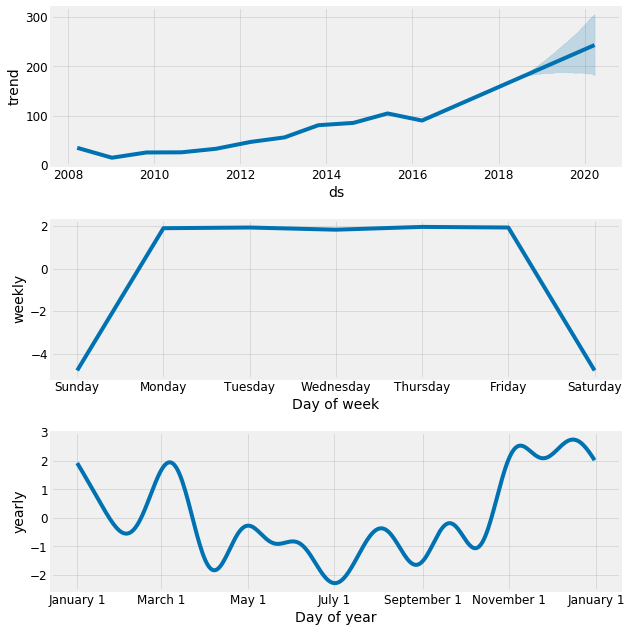

In [79]:
mastercard_prophet.plot_components(mastercard_forecast);